In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
delta = 0.025
x, y = np.meshgrid(np.arange(-3.0, 3.0, delta), np.arange(-2.0, 2.0, delta))
z1 = np.exp(-x**2 - y**2)
z2 = np.exp(-(x-1)**2 - (y-1)**2)
z = (z1 - z2) * 2

Create a simple contour plot with labels using default colors. The inline argument to clabel will control whether the labels are draw over the line segments of the contour, removing the lines beneath the label.

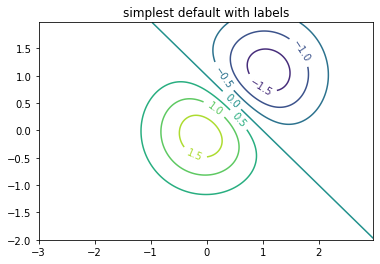

In [3]:
fig, ax = plt.subplots()

cs = ax.contour(x, y, z)
ax.clabel(cs, inline=True, fontsize=10)
ax.set_title("simplest default with labels")
plt.show()

Contour labels can be placed manually by providing list of positions (in data coordinate)

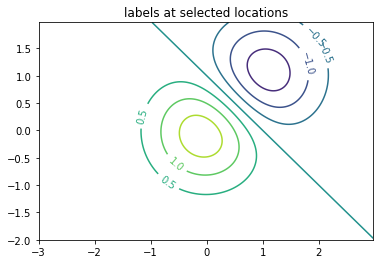

In [4]:
fig, ax = plt.subplots()

cs = ax.contour(x, y, z)
manual_locations = [
    (-1, -1.4), (-0.62, -0.7), (-2, 0.5),
    (1.7, 1.2), (2.0, 1.4), (2.4, 1.7),
]

ax.clabel(cs, inline=True, fontsize=10, manual=manual_locations)
ax.set_title("labels at selected locations")
plt.show()

You can force all the contours to be the same color.

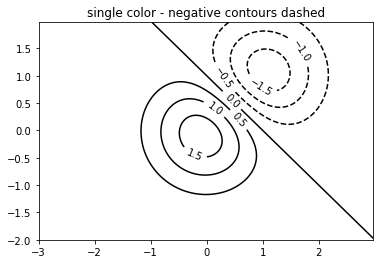

In [5]:
fig, ax = plt.subplots()

cs = ax.contour(x, y, z, colors="k") # negative contours default to dashed
ax.clabel(cs, fontsize=10, inline=True)
ax.set_title("single color - negative contours dashed")
plt.show()

You can set negative contours to be solid instead of dashed.

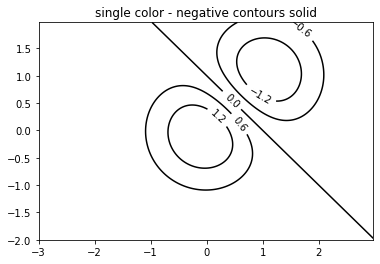

In [6]:
plt.rcParams["contour.negative_linestyle"] = "solid"

fig, ax = plt.subplots()

cs = ax.contour(x, y, z, 6, colors="k")
ax.clabel(cs, inline=True, fontsize=10)
ax.set_title("single color - negative contours solid")
plt.show()

And you can manually specify the colors and linewidths of the contour.

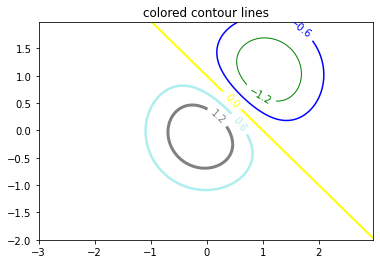

In [7]:
fig, ax = plt.subplots()

cs = ax.contour(
    x, y, z, 6, linewidths=np.arange(0.5, 4, 0.5),
    colors=("r", "green", "blue", (1, 1, 0), "#afeeee", "0.5"),
)

ax.clabel(cs, inline=True, fontsize=10)
ax.set_title("colored contour lines")
plt.show()

Or you can use a colormap to specify the colors; the default colormap will be used for the contour lines

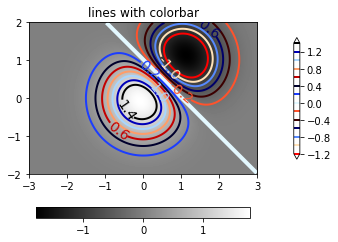

In [8]:
fig, ax = plt.subplots()

im = ax.imshow(
    z, interpolation="bilinear", origin="lower",
    cmap=cm.gray, extent=(-3, 3, -2, 2),
)

levels = np.arange(-1.2, 1.6, 0.2)
cs = ax.contour(
    z, levels, origin="lower", cmap="flag", extend="both",
    linewidths=2, extent=(-3, 3, -2, 2),
)

# thicken the zero contour
cs.collections[6].set_linewidth(4)

ax.clabel(cs, levels[1::2], inline=True, fmt="%1.1f", fontsize=14) # label every second level

# make a colorbar for the contour lines
cb = fig.colorbar(cs, shrink=0.8)

ax.set_title("lines with colorbar")

# we can still add a colorbar for the image, too
cbi = fig.colorbar(im, orientation="horizontal", shrink=0.8)

# this makes the original colorbar look a bit out of place
# so let's improve its position
l, b, w, h = ax.get_position().bounds
ll, bb, ww, hh = cb.ax.get_position().bounds
cb.ax.set_position([ll, b + 0.1 * h, ww, h * 0.8])

plt.show()